# 5. 연관어 분석

## 5.1 동시 출현 기반 연관어 분석

In [1]:
import pandas as pd
import glob
from afinn import Afinn
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pos_review=(glob.glob(r"데이터\aclImdb\train\pos\\*.txt"))[0:100]

lines_pos=[]
for i in pos_review:
    try:
        f = open(i, 'r')
        temp = f.readlines()[0]
        lines_pos.append(temp)
        f.close()
    except Exception as e:
        continue

len(lines_pos)

100

In [3]:
tokenizer = RegexpTokenizer('[\w]+')

stop_words = stopwords.words('english')


count = {}   #동시출현 빈도가 저장될 dict
for line in lines_pos:
    words =  line.lower()
    tokens = tokenizer.tokenize(words)
    stopped_tokens = [i for i in list(set(tokens)) if not i in stop_words+["br"]]
    stopped_tokens2 = [i for i in stopped_tokens if len(i)>1]
    for i, a in enumerate(stopped_tokens2):
        for b in stopped_tokens2[i+1:]:
            if a>b: 
                count[b, a] = count.get((b, a),0) + 1  
            else :
                count[a, b] = count.get((a, b),0) + 1     


df=pd.DataFrame.from_dict(count, orient='index')


list1=[]
for i in range(len(df)):
    list1.append([df.index[i][0],df.index[i][1],df[0][i]])


df2=pd.DataFrame(list1, columns=["term1","term2","freq"])

df3=df2.sort_values(by=['freq'],ascending=False)

df3_pos=df3.reset_index(drop=True)
df3_pos.head(20)

,term1,term2,freq
0,film,story,41
1,movie,one,41
2,film,movie,35
3,movie,story,35
4,one,story,33
5,good,movie,32
6,film,one,31
7,movie,see,30
8,film,like,27
9,one,see,27


In [18]:
neg_review=(glob.glob(r"데이터\aclImdb\train\neg\\*.txt"))[0:100]


lines_neg=[]
for i in neg_review:
    try:
        f = open(i, 'r')
        temp = f.readlines()[0]
        lines_neg.append(temp)
        f.close()
    except Exception as e:
        continue



count = {}   #동시출현 빈도가 저장될 dict
for line in lines_neg:
    words =  line.lower()
    tokens = tokenizer.tokenize(words)
    stopped_tokens = [i for i in list(set(tokens)) if not i in stop_words+["br"]]
    stopped_tokens2 = [i for i in stopped_tokens if len(i)>1]
    for i, a in enumerate(stopped_tokens2):
        for b in stopped_tokens2[i+1:]:
            if a>b: 
                count[b, a] = count.get((b, a),0) + 1  
            else :
                count[a, b] = count.get((a, b),0) + 1 





df=pd.DataFrame.from_dict(count, orient='index')


list1=[]
for i in range(len(df)):
    list1.append([df.index[i][0],df.index[i][1],df[0][i]])


df2=pd.DataFrame(list1, columns=["term1","term2","freq"])

df3=df2.sort_values(by=['freq'],ascending=False)

df3_neg=df3.reset_index(drop=True)
df3_neg.head(20)

,term1,term2,freq
0,film,movie,42
1,like,movie,40
2,movie,one,38
3,film,one,35
4,like,one,33
5,good,movie,32
6,even,movie,32
7,even,like,31
8,good,one,30
9,film,like,29


## 5.2 통계적 가중치 기반 연관어 분석

In [4]:
import pandas as pd
import glob
from afinn import Afinn
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse
import matplotlib.pyplot as plt

In [7]:
pos_review=(glob.glob(r"데이터\aclImdb\train\pos\\*.txt"))[0:100]

lines_pos=[]
for i in pos_review:
    try:
        f = open(i, 'r')
        temp = f.readlines()[0]
        lines_pos.append(temp)
        f.close()
    except Exception as e:
        continue
        
        
tokenizer = RegexpTokenizer('[\w]+')

stop_words = stopwords.words('english')

vec = TfidfVectorizer(stop_words=stop_words)

vector_lines_pos = vec.fit_transform(lines_pos)


A=vector_lines_pos.toarray()
A=A.transpose()
A.shape

(4001, 100)

In [19]:
A=A.transpose()

A_sparse = sparse.csr_matrix(A)

similarities_sparse = cosine_similarity(A_sparse,dense_output=False)
list(similarities_sparse.todok().items())[20000:20010]

[((2067, 64), 0.08535313088245283),
 ((2070, 64), 0.08192716481804893),
 ((2083, 64), 0.05456475089157645),
 ((2084, 64), 0.42647370606358315),
 ((2085, 64), 0.029574870487718657),
 ((2088, 64), 0.42647370606358315),
 ((2092, 64), 0.8514016223797),
 ((2096, 64), 0.8514016223797),
 ((2103, 64), 0.18181239668893492),
 ((2105, 64), 0.8514016223797)]

In [23]:
vec.get_feature_names()[2092]

'loathing'

In [21]:
vec.get_feature_names()[64]

'aboard'

In [24]:
df=pd.DataFrame(list(similarities_sparse.todok().items()),columns=["words","weight"])

df2=df.sort_values(by=['weight'],ascending=False)

df2=df2.reset_index(drop=True)

df3=df2.loc[np.round(df2['weight']) < 1]

df3=df3.reset_index(drop=True)
df3.head(10)

,words,weight
0,"(3971, 3372)",0.499961
1,"(3372, 3971)",0.499961
2,"(2554, 1192)",0.499958
3,"(1192, 2554)",0.499958
4,"(2468, 1321)",0.499957
5,"(710, 2468)",0.499957
6,"(2468, 710)",0.499957
7,"(1321, 2468)",0.499957
8,"(889, 2146)",0.499909
9,"(2146, 889)",0.499909


In [27]:
print(vec.get_feature_names()[3971] + ", " + vec.get_feature_names()[3372])

writers, stop


## 5.3 wod2vec 기반 연관어 분석

In [29]:
import pandas as pd
import glob
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
import numpy as np
from nltk.tokenize import RegexpTokenizer
from gensim.models.word2vec import Word2Vec

In [30]:
pos_review=(glob.glob(r"데이터\aclImdb\train\pos\\*.txt"))[0:100]

lines_pos=[]
for i in pos_review:
    try:
        f = open(i, 'r')
        temp = f.readlines()[0]
        lines_pos.append(temp)
        f.close()
    except Exception as e:
        continue
        
tokenizer = RegexpTokenizer('[\w]+')
stop_words = stopwords.words('english')

text=[]
for line in lines_pos:
    words =  line.lower()
    tokens = tokenizer.tokenize(words)
    stopped_tokens = [i for i in list(set(tokens)) if not i in stop_words+["br"]]
    stopped_tokens2 = [i for i in stopped_tokens if len(i)>1]
    text.append(stopped_tokens2)


model = Word2Vec(text, sg=1, window=2, min_count=3) #word2vec 모델 생성 / sg=1 Skip-gram / window=2 중심 단어로부터 좌우 2개 

model.init_sims(replace=True)

model.wv.similarity('film', 'movie')

0.8724317

In [32]:
model.wv.most_similar("good",topn =5)

[('like', 0.8769959807395935),
 ('movie', 0.8657535314559937),
 ('time', 0.8639994263648987),
 ('story', 0.8601412773132324),
 ('one', 0.8574163317680359)]

## 5.4 중심성(Centrality) 계수

In [29]:
import pandas as pd
import glob
from afinn import Afinn
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
import numpy as np
import matplotlib.pyplot as plt

In [33]:
### 긍정
pos_review=(glob.glob("데이터\\aclImdb\\train\\pos\\*.txt"))[0:100]

lines_pos=[]
for i in pos_review:
    try:
        f = open(i, 'r')
        temp = f.readlines()[0]
        lines_pos.append(temp)
        f.close()
    except Exception as e:
        continue

tokenizer = RegexpTokenizer('[\w]+')

stop_words = stopwords.words('english')

count = {}   #동시출현 빈도가 저장될 dict
for line in lines_pos:
    words =  line.lower()
    tokens = tokenizer.tokenize(words)
    stopped_tokens = [i for i in list(set(tokens)) if not i in stop_words+["br"]]
    stopped_tokens2 = [i for i in stopped_tokens if len(i)>1]
    for i, a in enumerate(stopped_tokens2):
        for b in stopped_tokens2[i+1:]:
            if a>b: 
                count[b, a] = count.get((b, a),0) + 1  
            else :
                count[a, b] = count.get((a, b),0) + 1  

df=pd.DataFrame.from_dict(count, orient='index')

list1=[]
for i in range(len(df)):
    list1.append([df.index[i][0],df.index[i][1],df[0][i]])

df2=pd.DataFrame(list1, columns=["term1","term2","freq"])

df3=df2.sort_values(by=['freq'],ascending=False)

df3_pos=df3.reset_index(drop=True)


### 부정
neg_review=(glob.glob("데이터\\aclImdb\\train\\neg\\*.txt"))[0:100]

lines_neg=[]
for i in neg_review:
    try:
        f = open(i, 'r')
        temp = f.readlines()[0]
        lines_neg.append(temp)
        f.close()
    except Exception as e:
        continue

count = {}   #동시출현 빈도가 저장될 dict
for line in lines_neg:
    words =  line.lower()
    tokens = tokenizer.tokenize(words)
    stopped_tokens = [i for i in list(set(tokens)) if not i in stop_words+["br"]]
    stopped_tokens2 = [i for i in stopped_tokens if len(i)>1]
    for i, a in enumerate(stopped_tokens2):
        for b in stopped_tokens2[i+1:]:
            if a>b: 
                count[b, a] = count.get((b, a),0) + 1  
            else :
                count[a, b] = count.get((a, b),0) + 1 

df=pd.DataFrame.from_dict(count, orient='index')

list1=[]
for i in range(len(df)):
    list1.append([df.index[i][0],df.index[i][1],df[0][i]])

df2=pd.DataFrame(list1, columns=["term1","term2","freq"])

df3=df2.sort_values(by=['freq'],ascending=False)

df3_neg=df3.reset_index(drop=True)

In [34]:
import networkx as nx
import operator

In [35]:
G_pos=nx.Graph()

for i in range((len(np.where(df3_pos['freq']>10)[0]))):
    G_pos.add_edge(df3_pos['term1'][i], df3_pos['term2'][i], weight=int(df3_pos['freq'][i]))

dgr = nx.degree_centrality(G_pos)
btw = nx.betweenness_centrality(G_pos)
cls = nx.closeness_centrality(G_pos)
egv = nx.eigenvector_centrality(G_pos)

sorted_dgr = sorted(dgr.items(), key=operator.itemgetter(1), reverse=True)
sorted_btw = sorted(btw.items(), key=operator.itemgetter(1), reverse=True)
sorted_cls = sorted(cls.items(), key=operator.itemgetter(1), reverse=True)
sorted_egv = sorted(egv.items(), key=operator.itemgetter(1), reverse=True)

print("** degree **")
for x in range(20):
    print(sorted_dgr[x])

print("** betweenness **")
for x in range(10):
    print(sorted_btw[x])

print("** closeness **")
for x in range(10):
    print(sorted_cls[x])

print("** eigenvector **")
for x in range(10):
    print(sorted_egv[x])


** degree **
('movie', 0.8131868131868133)
('film', 0.7802197802197803)
('one', 0.6593406593406594)
('story', 0.6153846153846154)
('like', 0.38461538461538464)
('see', 0.37362637362637363)
('time', 0.3296703296703297)
('well', 0.28571428571428575)
('good', 0.2527472527472528)
('much', 0.2417582417582418)
('great', 0.19780219780219782)
('titanic', 0.16483516483516486)
('many', 0.15384615384615385)
('think', 0.15384615384615385)
('people', 0.14285714285714288)
('best', 0.14285714285714288)
('love', 0.14285714285714288)
('really', 0.14285714285714288)
('even', 0.13186813186813187)
('first', 0.13186813186813187)
** betweenness **
('movie', 0.3402476644234887)
('film', 0.2953840095598338)
('one', 0.1511907425094238)
('story', 0.11283095414963536)
('titanic', 0.022950792932477912)
('williams', 0.021978021978021976)
('jack', 0.021978021978021976)
('like', 0.020412265119224823)
('see', 0.015291657196419103)
('dicaprio', 0.008931398949713969)
** closeness **
('movie', 0.8425925925925926)
('film

In [36]:
G_neg=nx.Graph()

for i in range((len(np.where(df3_neg['freq']>10)[0]))):
    G_neg.add_edge(df3_neg['term1'][i], df3_neg['term2'][i], weight=int(df3_neg['freq'][i]))

dgr = nx.degree_centrality(G_neg)
btw = nx.betweenness_centrality(G_neg)
cls = nx.closeness_centrality(G_neg)
egv = nx.eigenvector_centrality(G_neg)

sorted_dgr = sorted(dgr.items(), key=operator.itemgetter(1), reverse=True)
sorted_btw = sorted(btw.items(), key=operator.itemgetter(1), reverse=True)
sorted_cls = sorted(cls.items(), key=operator.itemgetter(1), reverse=True)
sorted_egv = sorted(egv.items(), key=operator.itemgetter(1), reverse=True)

print("** degree **")
for x in range(10):
    print(sorted_dgr[x])

print("** betweenness **")
for x in range(10):
    print(sorted_btw[x])

print("** closeness **")
for x in range(10):
    print(sorted_cls[x])
    
print("** eigenvector **")
for x in range(10):
    print(sorted_egv[x])

** degree **
('movie', 0.8131868131868133)
('like', 0.7362637362637363)
('one', 0.6593406593406594)
('film', 0.6373626373626374)
('even', 0.5164835164835165)
('good', 0.4285714285714286)
('would', 0.37362637362637363)
('story', 0.3626373626373627)
('much', 0.3076923076923077)
('really', 0.28571428571428575)
** betweenness **
('movie', 0.308304850905864)
('like', 0.21616648944282554)
('film', 0.15728284389301903)
('one', 0.14797721518590118)
('even', 0.05382769076310365)
('good', 0.02303288989065687)
('story', 0.01925692884541145)
('would', 0.017236709853387294)
('much', 0.008233252663145021)
('kareena', 0.005149150116186804)
** closeness **
('movie', 0.8425925925925926)
('like', 0.7913043478260869)
('one', 0.7459016393442623)
('film', 0.7338709677419355)
('even', 0.674074074074074)
('good', 0.6363636363636364)
('would', 0.6148648648648649)
('story', 0.610738255033557)
('much', 0.5909090909090909)
('really', 0.5833333333333334)
** eigenvector **
('movie', 0.28210644395390705)
('like', 0

## 5.5 연관어 네트워크 시각화

In [37]:
import pandas as pd
import glob
from afinn import Afinn
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
import numpy as np
import matplotlib.pyplot as plt

In [46]:
pos_review=(glob.glob(r"C:데이터\aclImdb\train\pos\\*.txt"))

lines_pos=[]
for i in pos_review:
    try:
        f = open(i, 'r')
        temp = f.readlines()[0]
        lines_pos.append(temp)
        f.close()
    except Exception as e:
        continue
        
                
tokenizer = RegexpTokenizer('[\w]+')

stop_words = stopwords.words('english')

count = {}   #동시출현 빈도가 저장될 dict
for line in lines_pos:
    words =  line.lower()
    tokens = tokenizer.tokenize(words)
    stopped_tokens = [i for i in list(set(tokens)) if not i in stop_words+["br"]]
    stopped_tokens2 = [i for i in stopped_tokens if len(i)>1]
    for i, a in enumerate(stopped_tokens2):
        for b in stopped_tokens2[i+1:]:
            if a>b: 
                count[b, a] = count.get((b, a),0) + 1  
            else :
                count[a, b] = count.get((a, b),0) + 1     


df=pd.DataFrame.from_dict(count, orient='index')


list1=[]
for i in range(len(df)):
    list1.append([df.index[i][0],df.index[i][1],df[0][i]])


df2=pd.DataFrame(list1, columns=["term1","term2","freq"])

df3=df2.sort_values(by=['freq'],ascending=False)

df3_pos=df3.reset_index(drop=True)

In [47]:
import networkx as nx
import operator

In [39]:
G_pos=nx.Graph()

for i in range((len(np.where(df3_pos['freq']>10)[0]))):
    G_pos.add_edge(df3_pos['term1'][i], df3_pos['term2'][i], weight=int(df3_pos['freq'][i]))

dgr = nx.degree_centrality(G_pos)
btw = nx.betweenness_centrality(G_pos)
cls = nx.closeness_centrality(G_pos)
egv = nx.eigenvector_centrality(G_pos)

sorted_dgr = sorted(dgr.items(), key=operator.itemgetter(1), reverse=True)
sorted_btw = sorted(btw.items(), key=operator.itemgetter(1), reverse=True)
sorted_cls = sorted(cls.items(), key=operator.itemgetter(1), reverse=True)
sorted_egv = sorted(egv.items(), key=operator.itemgetter(1), reverse=True)

C:\Users\SOJINSOO\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


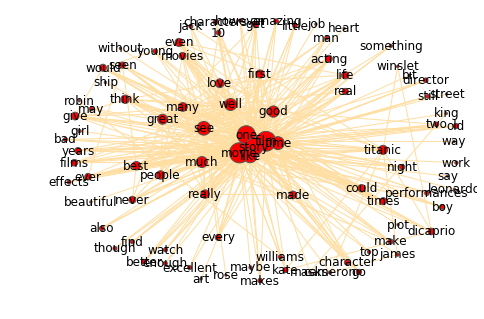

In [40]:
G = nx.Graph()

for i in range(len(sorted_cls)):
    G.add_node(sorted_cls[i][0], nodesize=sorted_dgr[i][1])

for i in range((len(np.where(df3_pos['freq']>10)[0]))):
    G.add_weighted_edges_from([(df3_pos['term1'][i], df3_pos['term2'][i],int(df3_pos['freq'][i]))])

sizes = [G.node[node]['nodesize']*500 for node in G]

options = {
    'edge_color': '#FFDEA2',
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
}

nx.draw(G, node_size=sizes, pos=nx.spring_layout(G, k=3.5, iterations=50), **options)
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555") 
plt.show()